# Customer Segmentation - Using EDA

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Preprocessing](#section3)
4. [Customer Segmentation using EDA](#section4)<br>
    - 4.1 [Customer Segmentation](#section401)<br>
    - 4.2 [Customer Segmentation as per value counts](#section501)<br>

## 1. Problem Statement

The goal is to make __different segments of customers__ for the insurance using __EDA__.

## 2. Data Loading and Description

- The dataset consists the information about the people for the customer segmentation. Various variables present in the data includes Customer gender,  Income Type, Price of goods etc.

- The dataset comprises of __600 observations of 14 columns__.

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\envs\gputest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# 3. Data Preprocessing

In [2]:
cust_data = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Work/Final_Data/Customer_data_v2.csv")

In [3]:
cust_data.shape

(600, 14)

In [4]:
cust_data.head()

,Customer_id,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,Month,Year,Product,Brand,Rating,AMT_GOODS_PRICE,AMT_INCOME_TOTAL
0,1900001,F,N,Y,1,State servant,Secondary / secondary special,Apr,2019,Refrigerator,LG,8,32805,135000
1,1900002,M,Y,Y,1,Working,Secondary / secondary special,Apr,2019,Microwave,LG,8,11903,99000
2,1900003,M,N,Y,2,Pensioner,Secondary / secondary special,Apr,2019,WaterPurifier,LG,8,12628,202500
3,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,Apr,2019,Blender,LG,9,7671,315000
4,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,Apr,2019,Microwave,LG,7,12315,315000


In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_id          600 non-null    int64 
 1   CODE_GENDER          600 non-null    object
 2   FLAG_OWN_CAR         600 non-null    object
 3   FLAG_OWN_REALTY      600 non-null    object
 4   CNT_CHILDREN         600 non-null    int64 
 5   NAME_INCOME_TYPE     600 non-null    object
 6   NAME_EDUCATION_TYPE  600 non-null    object
 7   Month                600 non-null    object
 8   Year                 600 non-null    int64 
 9   Product              600 non-null    object
 10  Brand                600 non-null    object
 11  Rating               600 non-null    int64 
 12  AMT_GOODS_PRICE      600 non-null    int64 
 13  AMT_INCOME_TOTAL     600 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 65.8+ KB


In [6]:
cust_data.describe()

,Customer_id,CNT_CHILDREN,Year,Rating,AMT_GOODS_PRICE,AMT_INCOME_TOTAL
count,6.000000e+02,600.000000,600.0,600.000000,600.000000,600.00000
mean,1.900153e+06,0.365000,2019.0,8.153333,17714.585000,230322.49500
std,8.998748e+01,0.756789,0.0,0.790061,9801.171285,104776.24482
min,1.900001e+06,0.000000,2019.0,7.000000,5143.000000,40500.00000
25%,1.900071e+06,0.000000,2019.0,8.000000,10894.000000,157500.00000
50%,1.900157e+06,0.000000,2019.0,8.000000,12628.000000,225000.00000
75%,1.900230e+06,1.000000,2019.0,9.000000,27733.000000,282375.00000
max,1.900300e+06,8.000000,2019.0,10.000000,40000.000000,675000.00000


- Grouping the customers using Customer_id to find Mean Amount spent on goods purchased

In [7]:
mean_goods_price = cust_data.groupby(['Customer_id'])['AMT_GOODS_PRICE'].mean() # don't reset the index!
cust_data = cust_data.set_index(['Customer_id']) # make the same index here
cust_data['MEAN_AMT_GOODS_PRICE'] = mean_goods_price
cust_data = cust_data.reset_index() # to take the hierarchical index off again

In [8]:
cust_data.drop(['AMT_GOODS_PRICE'],axis=1, inplace=True)

In [9]:
cust_data.drop(['Brand','Month', 'Product', 'Rating'],axis=1, inplace=True)

In [10]:
cust_data.drop_duplicates(keep='first', inplace=True, ignore_index= True)

In [11]:
cust_data.head()

,Customer_id,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,Year,AMT_INCOME_TOTAL,MEAN_AMT_GOODS_PRICE
0,1900001,F,N,Y,1,State servant,Secondary / secondary special,2019,135000,32805.000000
1,1900002,M,Y,Y,1,Working,Secondary / secondary special,2019,99000,11903.000000
2,1900003,M,N,Y,2,Pensioner,Secondary / secondary special,2019,202500,12628.000000
3,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667
4,1900005,M,Y,N,0,Working,Incomplete higher,2019,180000,6907.000000


# 4. Customer segmentation using EDA

#### Segmentation  for Mean goods price

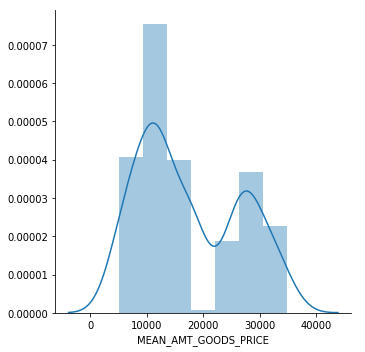

In [12]:
sns.FacetGrid(cust_data, size=5) \
   .map(sns.distplot, "MEAN_AMT_GOODS_PRICE") \
   .add_legend();
plt.show();

In [13]:
cust_data['MEAN_AMT_GOODS_PRICE'].describe()

count      300.000000
mean     17505.758889
std       8829.930678
min       5143.000000
25%      10770.250000
50%      17686.166667
75%      26429.750000
max      34876.000000
Name: MEAN_AMT_GOODS_PRICE, dtype: float64

In [14]:
bins = [5000, 15000,25000,35000]
labels = ['low', 'medium', 'high']
cust_data['MEAN_AMT_GOODS_PRICE_category'] = pd.cut(cust_data['MEAN_AMT_GOODS_PRICE'], bins=bins, labels=labels, right=False)
cust_data.head()

,Customer_id,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,Year,AMT_INCOME_TOTAL,MEAN_AMT_GOODS_PRICE,MEAN_AMT_GOODS_PRICE_category
0,1900001,F,N,Y,1,State servant,Secondary / secondary special,2019,135000,32805.000000,high
1,1900002,M,Y,Y,1,Working,Secondary / secondary special,2019,99000,11903.000000,low
2,1900003,M,N,Y,2,Pensioner,Secondary / secondary special,2019,202500,12628.000000,low
3,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667,medium
4,1900005,M,Y,N,0,Working,Incomplete higher,2019,180000,6907.000000,low


- We have divided the dataset based on purchase capacity of customer i.e low, medium and high

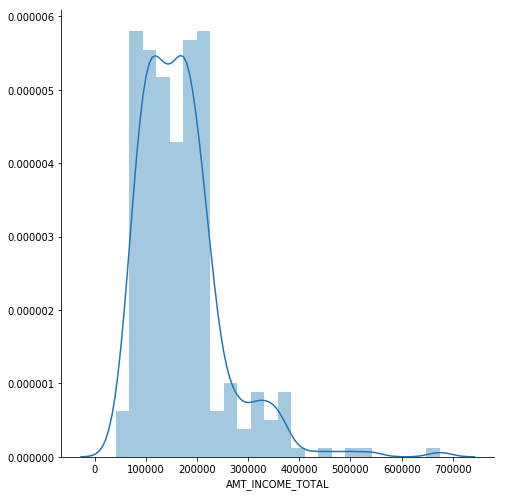

In [15]:
sns.FacetGrid(cust_data, size=7) \
   .map(sns.distplot, "AMT_INCOME_TOTAL") \
   .add_legend();
plt.show();

In [16]:
cust_data['AMT_INCOME_TOTAL'].describe()

count       300.000000
mean     168369.990000
std       82450.908425
min       40500.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      675000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [17]:
bins = [40000,110000, 300000,700000]
labels = ['low', 'medium', 'high']
cust_data['AMT_INCOME_TOTAL_category'] = pd.cut(cust_data['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)
cust_data.head()

,Customer_id,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,Year,AMT_INCOME_TOTAL,MEAN_AMT_GOODS_PRICE,MEAN_AMT_GOODS_PRICE_category,AMT_INCOME_TOTAL_category
0,1900001,F,N,Y,1,State servant,Secondary / secondary special,2019,135000,32805.000000,high,medium
1,1900002,M,Y,Y,1,Working,Secondary / secondary special,2019,99000,11903.000000,low,low
2,1900003,M,N,Y,2,Pensioner,Secondary / secondary special,2019,202500,12628.000000,low,medium
3,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667,medium,high
4,1900005,M,Y,N,0,Working,Incomplete higher,2019,180000,6907.000000,low,medium


- We have divided the dataset based on income of customer i.e low, medium and high

In [18]:
cust_data['MEAN_AMT_GOODS_PRICE_category'].value_counts()

low       149
high      100
medium     51
Name: MEAN_AMT_GOODS_PRICE_category, dtype: int64

- Value counts as per new division of categories over Mean Amount of Goods

In [19]:
cust_data['AMT_INCOME_TOTAL_category'].value_counts()

medium    212
low        65
high       23
Name: AMT_INCOME_TOTAL_category, dtype: int64

- Value counts as per new division of classes over Income of customer

### Code for Count Plot

In [20]:
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    this function sets up borders from an axis and personalize colors
    input:
        ax: figure axis
        right_border: flag to determine if the right border will be visible or not"""
    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')


def count_plot(feature, df, colors='Blues_d', hue=False):
    """docstring for count_plot:
    this function plots data setting up frequency and percentage. This algo sets up borders
    and personalization
    input:
        feature: feature to be plotted
        df: dataframe
        colors = color palette (default=Blues_d)
        hue = second feature analysis (default=False)"""
    
    # Preparing variables
    ncount = len(df)
    fig, ax = plt.subplots()
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)
        
    plt.show()

### Count Plot on the basis of Gender 

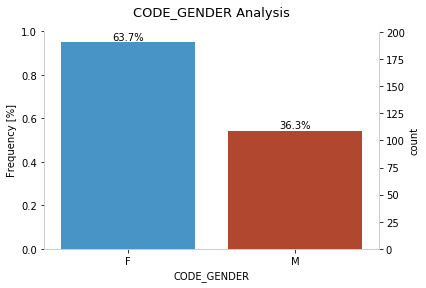

In [21]:
# Counting gender
custom_colors = ["#3498db", "#C8391A"]
count_plot(feature='CODE_GENDER', df=cust_data, colors=custom_colors)

### Count Plot on the basis of Car owned or not by the customer

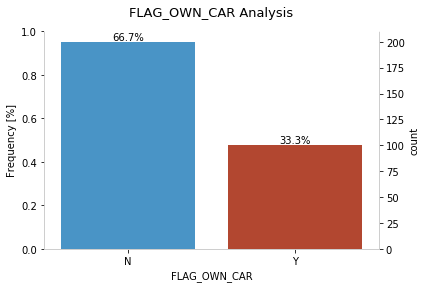

In [22]:
# Counting gender
custom_colors = ["#3498db", "#C8391A"]
count_plot(feature='FLAG_OWN_CAR', df=cust_data, colors=custom_colors)

- Only 33.3 % people own the car

### Count Plot on the basis of Realty owned or not by the customer

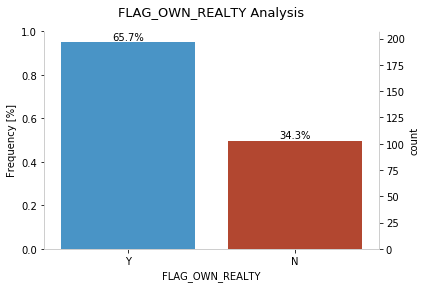

In [23]:
# Counting gender
custom_colors = ["#3498db", "#C8391A"]
count_plot(feature='FLAG_OWN_REALTY', df=cust_data, colors=custom_colors)

- 65.3 % people own the property

### Count Plot on the basis of Work

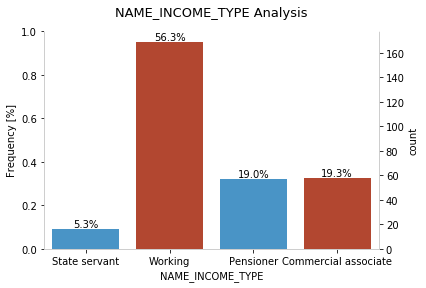

In [24]:
# Counting gender
custom_colors = ["#3498db", "#C8391A"]
count_plot(feature='NAME_INCOME_TYPE', df=cust_data, colors=custom_colors)### Count Plot on the basis of Realty owned or not by the customer

- 56.3 % of total customers are working class

## 4.1 Customer Segmentation

- __Customer are divided in 5 segments__
    - Target Customer
    - Careful Customer
    - Sensible Customer
    - Standard Customer
    - Careless Customer

In [25]:
def label_cluster(row):
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'high') and (row['AMT_INCOME_TOTAL_category'] == 'low') :
        return 'Careless Customer'
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'high') and (row['AMT_INCOME_TOTAL_category'] == 'medium') :
        return 'Careless Customer'
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'medium') and (row['AMT_INCOME_TOTAL_category'] == 'low'):
        return 'Careless Customer'
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'low') and (row['AMT_INCOME_TOTAL_category'] == 'medium'):
        return 'Target Customer'
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'low') and (row['AMT_INCOME_TOTAL_category'] == 'high'):
        return 'Careful Customer'
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'medium') and (row['AMT_INCOME_TOTAL_category'] == 'high'):
        return 'Target Customer'
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'high') and (row['AMT_INCOME_TOTAL_category'] == 'high'):
        return 'Careless Customer'
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'medium') and (row['AMT_INCOME_TOTAL_category'] == 'medium'):
        return 'Sensible Customer'
    if (row['MEAN_AMT_GOODS_PRICE_category'] == 'low') and (row['AMT_INCOME_TOTAL_category'] == 'low'):
        return 'Standard Customer'

In [26]:
cust_data['Customer Segment'] = cust_data.apply(label_cluster, axis = 1)
cust_data

,Customer_id,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,Year,AMT_INCOME_TOTAL,MEAN_AMT_GOODS_PRICE,MEAN_AMT_GOODS_PRICE_category,AMT_INCOME_TOTAL_category,Customer Segment
0,1900001,F,N,Y,1,State servant,Secondary / secondary special,2019,135000,32805.000000,high,medium,Careless Customer
1,1900002,M,Y,Y,1,Working,Secondary / secondary special,2019,99000,11903.000000,low,low,Standard Customer
2,1900003,M,N,Y,2,Pensioner,Secondary / secondary special,2019,202500,12628.000000,low,medium,Target Customer
3,1900004,M,Y,N,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667,medium,high,Target Customer
4,1900005,M,Y,N,0,Working,Incomplete higher,2019,180000,6907.000000,low,medium,Target Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1900296,F,Y,N,0,Working,Secondary / secondary special,2019,126000,30391.000000,high,medium,Careless Customer
296,1900297,M,Y,Y,0,Commercial associate,Secondary / secondary special,2019,315000,17686.166667,medium,high,Target Customer
297,1900298,M,Y,N,0,Pensioner,Secondary / secondary special,2019,72000,12551.000000,low,low,Standard Customer
298,1900299,M,N,N,0,Pensioner,Secondary / secondary special,2019,166500,25748.000000,high,medium,Careless Customer


## 4.2 Customer segmentation as per value counts

In [27]:
cust_data['Customer Segment'].value_counts()

Target Customer      131
Careless Customer    100
Standard Customer     40
Sensible Customer     29
Name: Customer Segment, dtype: int64

- __Observations__

    - We have 131 customers to target for our products i.e, 43.67% which is very good value.
    - We have 40 Standard and 29 Sensible customers also, with more due diligence we can pitch the products to them as well.